### Lamin

In [284]:
library(rio)
source('./ABCA7lof2/plotting.r')
library(ggplot2)
library(outliers)
library(ggforce)


In [285]:
data <- import_list('./raw_data/experimental/LaminAC_shape_measure.xlsx')
data = data[2:length(data)]
names = unlist(lapply(strsplit(names(data), '_'), function(x) x[[1]]))
N = c('mean_neun', 'intden_neun', 'mean_dapi', 'intden_dapi', 'mean_lam', 'intden_lam','count', 'perc_area', 'mean', 'intden', 'circ') 
                      
out = list()
for(i in 1:length(data)){
    cols_index = unlist(lapply(names(data[[i]]), function(x)  startsWith(x, 'Mean') | startsWith(x, 'Circ') | startsWith(x, 'IntDen')| startsWith(x, 'Count')| startsWith(x, '%')))
    x = data[[i]][,cols_index]
    colnames(x) = N
    x$projid = names[i]
    out[[i]] = x
}
                               
full_data = do.call('rbind', out)
                               
full_data['projid'][full_data['projid']=='5018174'] = '50108174'
full_data['projid'][full_data['projid']=='46246602'] = '46246604'
                               
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
full_data$LOF = summary[full_data$projid,'ABCA7LoF']
full_data$intden = as.numeric(full_data$intden)
full_data$circ = as.numeric(full_data$circ)
full_data[is.na(full_data)]=0
full_data = full_data[full_data$mean_neun>0 & full_data$mean_dapi>0,]

New names:
• `` -> `...1`
• `` -> `...3`
New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDen` -> `IntDen...25`
New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntD

In [293]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$perc_area, by=list(temp$projid, temp$LOF), 'mean')

T = dixon.test(temp$x)
if(T$p.value<0.05){
    keep = which(temp$x!=max(temp$x))
}

T = dixon.test(temp$x, opposite=TRUE)
if(T$p.value<0.05){
    keep2 = which(temp$x!=min(temp$x))
}else{
    keep2 = keep
}

print(keep_all)
keep_all = intersect(keep, keep2)

options(repr.plot.width=5, repr.plot.height=5)

pdf('./pdf_figures/lamin_area.pdf', width=5, height=5)
ggplot(temp[keep_all,], aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+ylim(0,35)+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('% Area') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('Lamin A/C') 
dev.off()

 [1]  1  2  3  4  5  6  7  8  9 10 12


png 
  2

In [296]:

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_lam, by=list(temp$projid, temp$LOF), 'mean')

T = dixon.test(temp$x)
if(T$p.value<0.05){
    keep = which(temp$x!=max(temp$x))
}

T = dixon.test(temp$x, opposite=TRUE)
if(T$p.value<0.05){
    keep2 = which(temp$x!=min(temp$x))
}else{
    keep2 = keep
}

keep_all = intersect(keep, keep2)
print(keep_all)
options(repr.plot.width=5, repr.plot.height=5)

pdf('./pdf_figures/lamin_mean.pdf', width=5, height=5)

ggplot(temp[keep_all,], aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+ylim(0,70)+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('Mean Nuclear Lamin A/C Intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('Lamin A/C') 

dev.off()

 [1]  1  2  3  4  5  6  7  8  9 10 12


png 
  2

### Tom20

In [225]:
data <- import_list('./raw_data/experimental/Tomm20_totalimagequant.xlsx')
data = data[2:length(data)]
data = data$quantifications

New names:
• `` -> `...1`
• `Area` -> `Area...2`
• `Mean` -> `Mean...3`
• `IntDen` -> `IntDen...4`
• `RawIntDen` -> `RawIntDen...5`
• `Area` -> `Area...6`
• `Mean` -> `Mean...7`
• `IntDen` -> `IntDen...8`
• `RawIntDen` -> `RawIntDen...9`
• `Area` -> `Area...10`
• `Mean` -> `Mean...11`
• `IntDen` -> `IntDen...12`
• `RawIntDen` -> `RawIntDen...13`


In [126]:
colnames(data) = c('projid', 'area_dapi', 'mean_dapi', 'intden_dapi', 'rawintden_dapi',
    'area_neun', 'mean_neun', 'intden_neun', 'rawintden_neun',
'area_tom', 'mean_tom', 'intden_tom', 'rawintden_tom')

data$LOF = unlist(lapply(strsplit(data$projid, '_'), function(x) x[[2]]))

data$projid = unlist(lapply(strsplit(data$projid, '_'), function(x) x[[1]]))
                            
data['projid'][data['projid']=='846353463'] = '84653463'
data['projid'][data['projid']=='46246602'] = '46246604'

In [127]:
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid

In [131]:
data$LOF = summary[data$projid,'ABCA7LoF']

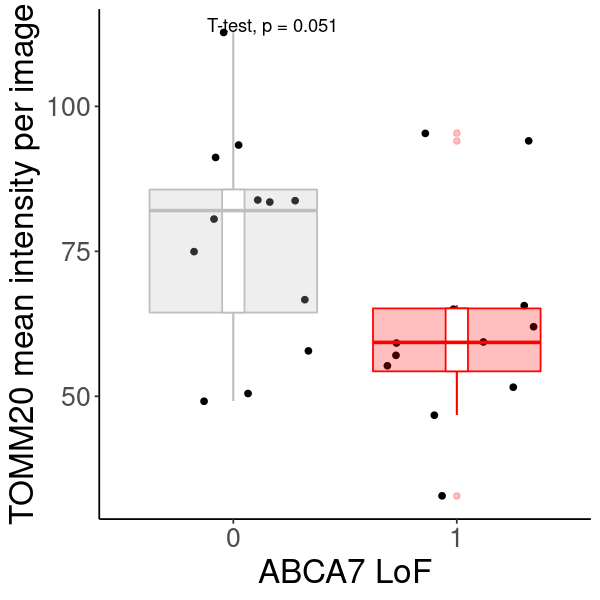

In [153]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(data, aes(x = factor(LOF), y = (mean_tom),
          fill = factor(LOF) ))+ geom_jitter()+geom_boxplot(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 't.test') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('TOMM20 mean intensity per image') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

## TOM20

In [226]:
library(rio)
source('./ABCA7lof2/plotting.r')

In [227]:
data <- import_list('./raw_data/experimental/Tomm20count_NeuNROI.xlsx')
data = data[2:length(data)]
names = unlist(lapply(strsplit(names(data), '_'), function(x) x[[1]]))
N = c('mean_neun', 'intden_neun', 'mean_dapi', 'intden_dapi', 'mean_tom', 'intden_tom', 'count', 'av_size', 'perc_area', 'mean', 'intden')                       

                      out = list()
for(i in 1:length(data)){
    cols_index = unlist(lapply(names(data[[i]]), function(x)  startsWith(x, 'Mean') | startsWith(x, 'Average') | startsWith(x, 'IntDen') | startsWith(x, 'Count') |startsWith(x, '%')))
    x = data[[i]][,cols_index]
    colnames(x) = N
    x$projid = names[i]
    out[[i]] = x
}
                               
full_data = do.call('rbind', out)
                               
full_data['projid'][full_data['projid']=='5018174'] = '50108174'
full_data['projid'][full_data['projid']=='46246602'] = '46246604'
                               
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
full_data$LOF = summary[full_data$projid,'ABCA7LoF']
full_data$intden = as.numeric(full_data$intden)
full_data$av_size = as.numeric(full_data$av_size)
full_data$mean = as.numeric(full_data$mean)
full_data[is.na(full_data)]=0
full_data = full_data[full_data$mean_neun>0 & full_data$mean_dapi>0,]

New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDen` -> `IntDen...25`
New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDe

In [228]:
options(repr.plot.width=5, repr.plot.height=5)

pdf('./pdf_figures/tomm_mean_percell.pdf', width=5, height=5)

ggplot(full_data, aes(x = factor(LOF), y = (mean_tom),
          fill = factor(LOF) ))+ylim(0,200)+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('mean TOMM20 intensity per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

dev.off()

png 
  2

In [229]:
options(repr.plot.width=5, repr.plot.height=5)

pdf('./pdf_figures/tomm_counts_per_cell.pdf', width=5, height=5)

ggplot(full_data, aes(x = factor(LOF), y = (count),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('TOMM20 count per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

dev.off()

png 
  2

In [230]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$count, by=list(temp$projid, temp$LOF), 'mean')

T = dixon.test(temp$x)
if(T$p.value<0.05){
    keep = which(temp$x!=max(temp$x))
}else{
    keep = 1:nrow(temp)
}
T = dixon.test(temp$x, opposite=TRUE)
if(T$p.value<0.05){
    keep2 = which(temp$x!=min(temp$x))
}else{
    keep2 = keep
}

keep_all = intersect(keep, keep2)
print(keep_all)
options(repr.plot.width=5, repr.plot.height=5)

pdf('./pdf_figures/tom_counts_per_ind.pdf', width=5, height=5)

ggplot(temp[keep_all,], aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('TOMM20 count per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('TOMM20') 

dev.off()

 [1]  1  2  3  4  5  6  7  8  9 10 11 12


png 
  2

In [231]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_tom, by=list(temp$projid, temp$LOF), 'mean')

T = dixon.test(temp$x)
if(T$p.value<0.05){
    keep = which(temp$x!=max(temp$x))
}else{
    keep = 1:nrow(temp)
}

T = dixon.test(temp$x, opposite=TRUE)
if(T$p.value<0.05){
    keep2 = which(temp$x!=min(temp$x))
}else{
    keep2 = keep
}

keep_all = intersect(keep, keep2)

print(keep_all)

options(repr.plot.width=5, repr.plot.height=5)

pdf('./pdf_figures/tomm_mean_per_ind.pdf', width=5, height=5)

ggplot(temp[keep_all,], aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('mean TOMM20 intensity per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('TOMM20')

dev.off()

 [1]  1  2  3  4  5  6  7  8  9 10 11 12


png 
  2

### srebp

In [232]:
data <- import_list('./raw_data/experimental/SREBP2_DAPIROIs.xlsx')
data = data[2:length(data)]
names = unlist(lapply(strsplit(names(data), '_'), function(x) x[[1]]))
N = c('area_neun', 'mean_neun', 'intden_neun', 'area_dapi', 'mean_dapi', 'intden_dapi', 'area_rage', 'mean_rage', 'intden_rage', 'area_sreb', 'mean_sreb', 'intden_sreb')                       

                      out = list()
for(i in 1:length(data)){
    cols_index = unlist(lapply(names(data[[i]]), function(x)  startsWith(x, 'Mean') | startsWith(x, 'Area') | startsWith(x, 'IntDen') ))
    x = data[[i]][,cols_index]
    colnames(x) = N
    x$projid = names[i]
    out[[i]] = x
}
                               
full_data = do.call('rbind', out)
                               
full_data['projid'][full_data['projid']=='5018174'] = '50108174'
full_data['projid'][full_data['projid']=='46246602'] = '46246604'
                               
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
full_data$LOF = summary[full_data$projid,'ABCA7LoF']
full_data$intden = as.numeric(full_data$intden)
full_data$av_size = as.numeric(full_data$av_size)
full_data$mean = as.numeric(full_data$mean)
full_data[is.na(full_data)]=0
                               
full_data = full_data[full_data$mean_neun>40 & full_data$mean_dapi>0 & full_data$area_neun<70,]


New names:
• `` -> `...1`
• `Area` -> `Area...2`
• `Mean` -> `Mean...3`
• `IntDen` -> `IntDen...4`
• `RawIntDen` -> `RawIntDen...5`
• `` -> `...6`
• `Area` -> `Area...7`
• `Mean` -> `Mean...8`
• `IntDen` -> `IntDen...9`
• `RawIntDen` -> `RawIntDen...10`
• `` -> `...11`
• `Area` -> `Area...12`
• `Mean` -> `Mean...13`
• `IntDen` -> `IntDen...14`
• `RawIntDen` -> `RawIntDen...15`
• `` -> `...16`
• `Area` -> `Area...17`
• `Mean` -> `Mean...18`
• `IntDen` -> `IntDen...19`
• `RawIntDen` -> `RawIntDen...20`
New names:
• `` -> `...1`
• `Area` -> `Area...2`
• `Mean` -> `Mean...3`
• `IntDen` -> `IntDen...4`
• `RawIntDen` -> `RawIntDen...5`
• `` -> `...6`
• `Area` -> `Area...7`
• `Mean` -> `Mean...8`
• `IntDen` -> `IntDen...9`
• `RawIntDen` -> `RawIntDen...10`
• `` -> `...11`
• `Area` -> `Area...12`
• `Mean` -> `Mean...13`
• `IntDen` -> `IntDen...14`
• `RawIntDen` -> `RawIntDen...15`
• `` -> `...16`
• `Area` -> `Area...17`
• `Mean` -> `Mean...18`
• `IntDen` -> `IntDen...19`
• `RawIntDen` -> `RawI

ERROR: Error in `$<-.data.frame`(`*tmp*`, intden, value = numeric(0)): replacement has 0 rows, data has 6403


In [255]:
options(repr.plot.width=5, repr.plot.height=5)
M1 = median(full_data$mean_sreb[full_data$LOF==1])
M2 = median(full_data$mean_sreb[full_data$LOF==0])

pdf('./pdf_figures/srebp_mean_per_cell.pdf', width=5, height=7)

ggplot(full_data, aes(x = factor(LOF), y = (mean_sreb),
          fill = factor(LOF) ))+ geom_hline(yintercept=M2, color='grey',  linetype='dashed')+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + ylim(0,80)+ scale_color_manual(values=c('grey', 'red')) + ylab('mean SREBP2 intensity per NeuN+ DAPI surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

dev.off()

png 
  2

In [234]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_sreb, by=list(temp$projid, temp$LOF), 'mean')

T = dixon.test(temp$x)
if(T$p.value<0.05){
    keep = which(temp$x!=max(temp$x))
}else{
    keep = 1:nrow(temp)
}

T = dixon.test(temp$x, opposite=TRUE)
if(T$p.value<0.05){
    keep2 = which(temp$x!=min(temp$x))
}else{
    keep2 = keep
}

keep_all = intersect(keep, keep2)

print(keep_all)

options(repr.plot.width=5, repr.plot.height=5)

pdf('./pdf_figures/srebp_mean_per_ind.pdf', width=5, height=5)

ggplot(temp[keep_all,], aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('mean SREBP2 intensity per NeuN+ DAPI surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('SREBP2')

dev.off()

 [1]  1  2  3  4  5  6  7  8  9 10 11 12


png 
  2

### COMET

In [297]:
data <- import_list('./raw_data/experimental/ABCA7_human_neutral comet_062722.xlsx')
data = data[1:length(data)]

In [298]:
code = data[[length(data)]]
rownames(code) = as.character(code[,1])
code = rbind(colnames(code), code)
colnames(code) = c('ind', 'projid')

In [311]:
out = list()
for (i in names(data)[1:length(data)-1]){
    temp = data[[i]]
    out[[i]] = temp[,c('FileName','TailMoment', 'TailLength', 'TailDNAPercent', 'OliveMoment', 'Flag')]
}
data_all = do.call('rbind', out)

In [312]:
data_all$ind = unlist(lapply(strsplit(data_all$FileName, '-'), function(x) x[[2]]))

In [313]:
data_all$projid = code[data_all$ind,'projid']

In [314]:
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
data_all$LOF = summary[data_all$projid, 'ABCA7LoF']

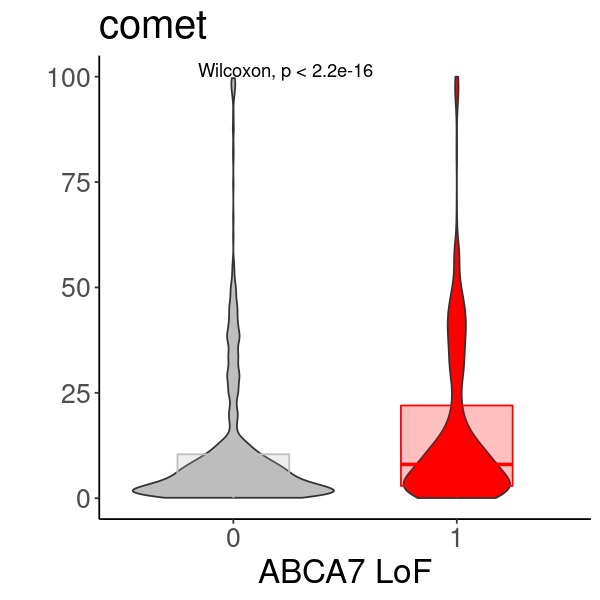

In [318]:
ggplot(data_all, aes(x = factor(LOF), y = (TailDNAPercent),
          fill = factor(LOF) ))+geom_violin()+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(LOF),color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('comet')

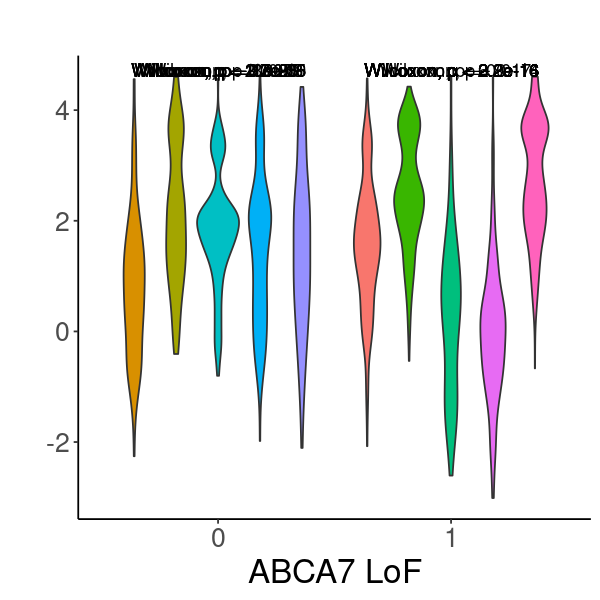

In [324]:
ggplot(data_all, aes(x = factor(LOF), y = log(TailDNAPercent),
          fill = factor(projid) ))+geom_violin()+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + ylab('') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('')

In [320]:
temp = data_all#[full_data$count>0,]
temp = aggregate(temp$TailLength, by=list(temp$projid, temp$LOF), 'mean')


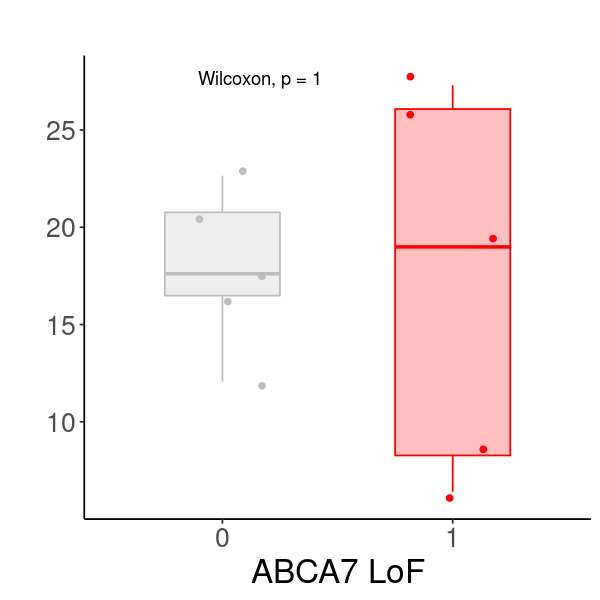

In [321]:

options(repr.plot.width=5, repr.plot.height=5)

ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('')

In [212]:
data_all

,FileName,TailMoment,ind,projid,LOF
,<chr>,<dbl>,<chr>,<chr>,<int>
N-1-1 (LOF).1,N-1-1.tif,0.002512563,1,20366419,1
N-1-1 (LOF).2,N-1-1.tif,0.005928122,1,20366419,1
N-1-1 (LOF).3,N-1-1.tif,0.017719706,1,20366419,1
N-1-1 (LOF).4,N-1-1.tif,0.057189211,1,20366419,1
N-1-1 (LOF).5,N-1-1.tif,0.066560724,1,20366419,1
N-1-1 (LOF).6,N-1-1.tif,0.071050892,1,20366419,1
N-1-1 (LOF).7,N-1-1.tif,0.076208318,1,20366419,1
N-1-1 (LOF).8,N-1-1.tif,0.092760345,1,20366419,1
N-1-1 (LOF).9,N-1-1.tif,0.093318839,1,20366419,1
